<a href="https://colab.research.google.com/github/Saish31/AIML/blob/main/Multi_Language_Text_To_Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install sentence_transformers

In [3]:
from sentence_transformers import SentenceTransformer, util
from PIL import Image
import matplotlib.pyplot as plt
import glob
import torch
import os

In [ ]:
!wget https://public.ukp.informatik.tu-darmstadt.de/reimers/sentence-transformers/datasets/unsplash-25k-photos.zip

In [ ]:
!unzip 'unsplash-25k-photos.zip' -d 'photos'

In [6]:
img_names = list(glob.glob('photos/*.jpg'))[:2000]
print(len(img_names))

2000


In [7]:
img_names[0]

'photos/aoWGZ3zu2Qc.jpg'

In [ ]:
img_model = SentenceTransformer('clip-ViT-B-32')

In [9]:
img_embed = img_model.encode([Image.open(img) for img in img_names], batch_size=32, convert_to_tensor=True)

**clip-ViT-B-32-multilingual-v1** is a multi-lingual version of the OpenAI **CLIP-ViT-B32** model. You can map text (in 50+ languages) and images to a common dense vector space such that images and the matching texts are close. This model can be used for image search (users search through a large collection of images) and for multi-lingual zero-shot image classification (image labels are defined as text).

In [ ]:
model = SentenceTransformer('clip-ViT-B-32-multilingual-v1')

In [11]:
img_folder = '/photos'

In [12]:
def search(query, top_k=3):
  query_embed = model.encode([query], convert_to_tensor=True)

  hits = util.semantic_search(query_embed, img_embed, top_k=top_k)[0]

  # print(hits)

  print('Query: ', query)
  for hit in hits:
    img_path = img_names[hit['corpus_id']]
    print(img_path)

    im = Image.open(img_path)
    plt.figure()
    plt.imshow(im)
    plt.show()

Query:  Perro
photos/Iyts7mPSaKQ.jpg


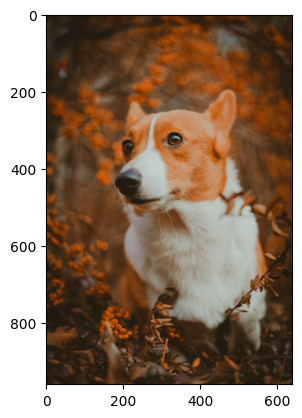

photos/ClkQd4-ZfSQ.jpg


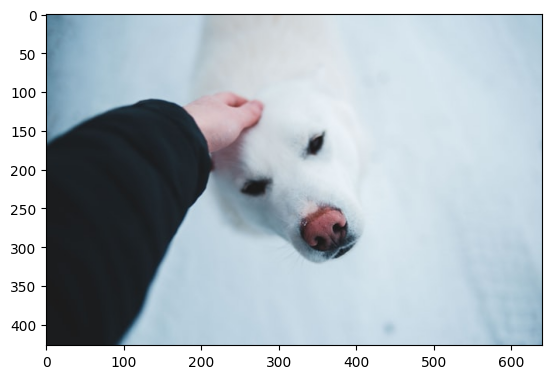

photos/yy03FLwEWAw.jpg


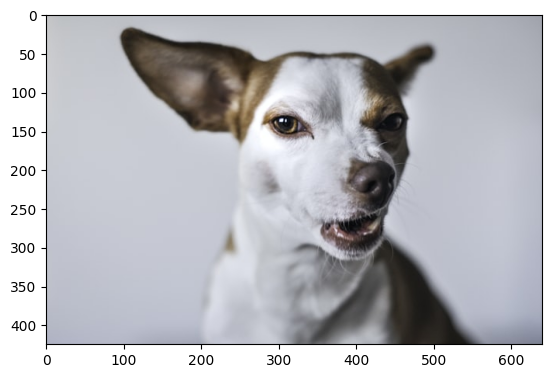

In [13]:
search('Perro')